In [1]:
import pandas as pd
from transform import DataTransformation
from df_info import DataFrameInfo, Plotter
import missingno as msno
from skew import SkewTransform
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def load_csv(data_csv):
    df = pd.read_csv(data_csv)
    return df
data_csv = 'data.csv'
df = load_csv(data_csv)

In [3]:
transformer  = DataTransformation(df)
df_info = DataFrameInfo(df)
df_plot = Plotter(df)

<Axes: >

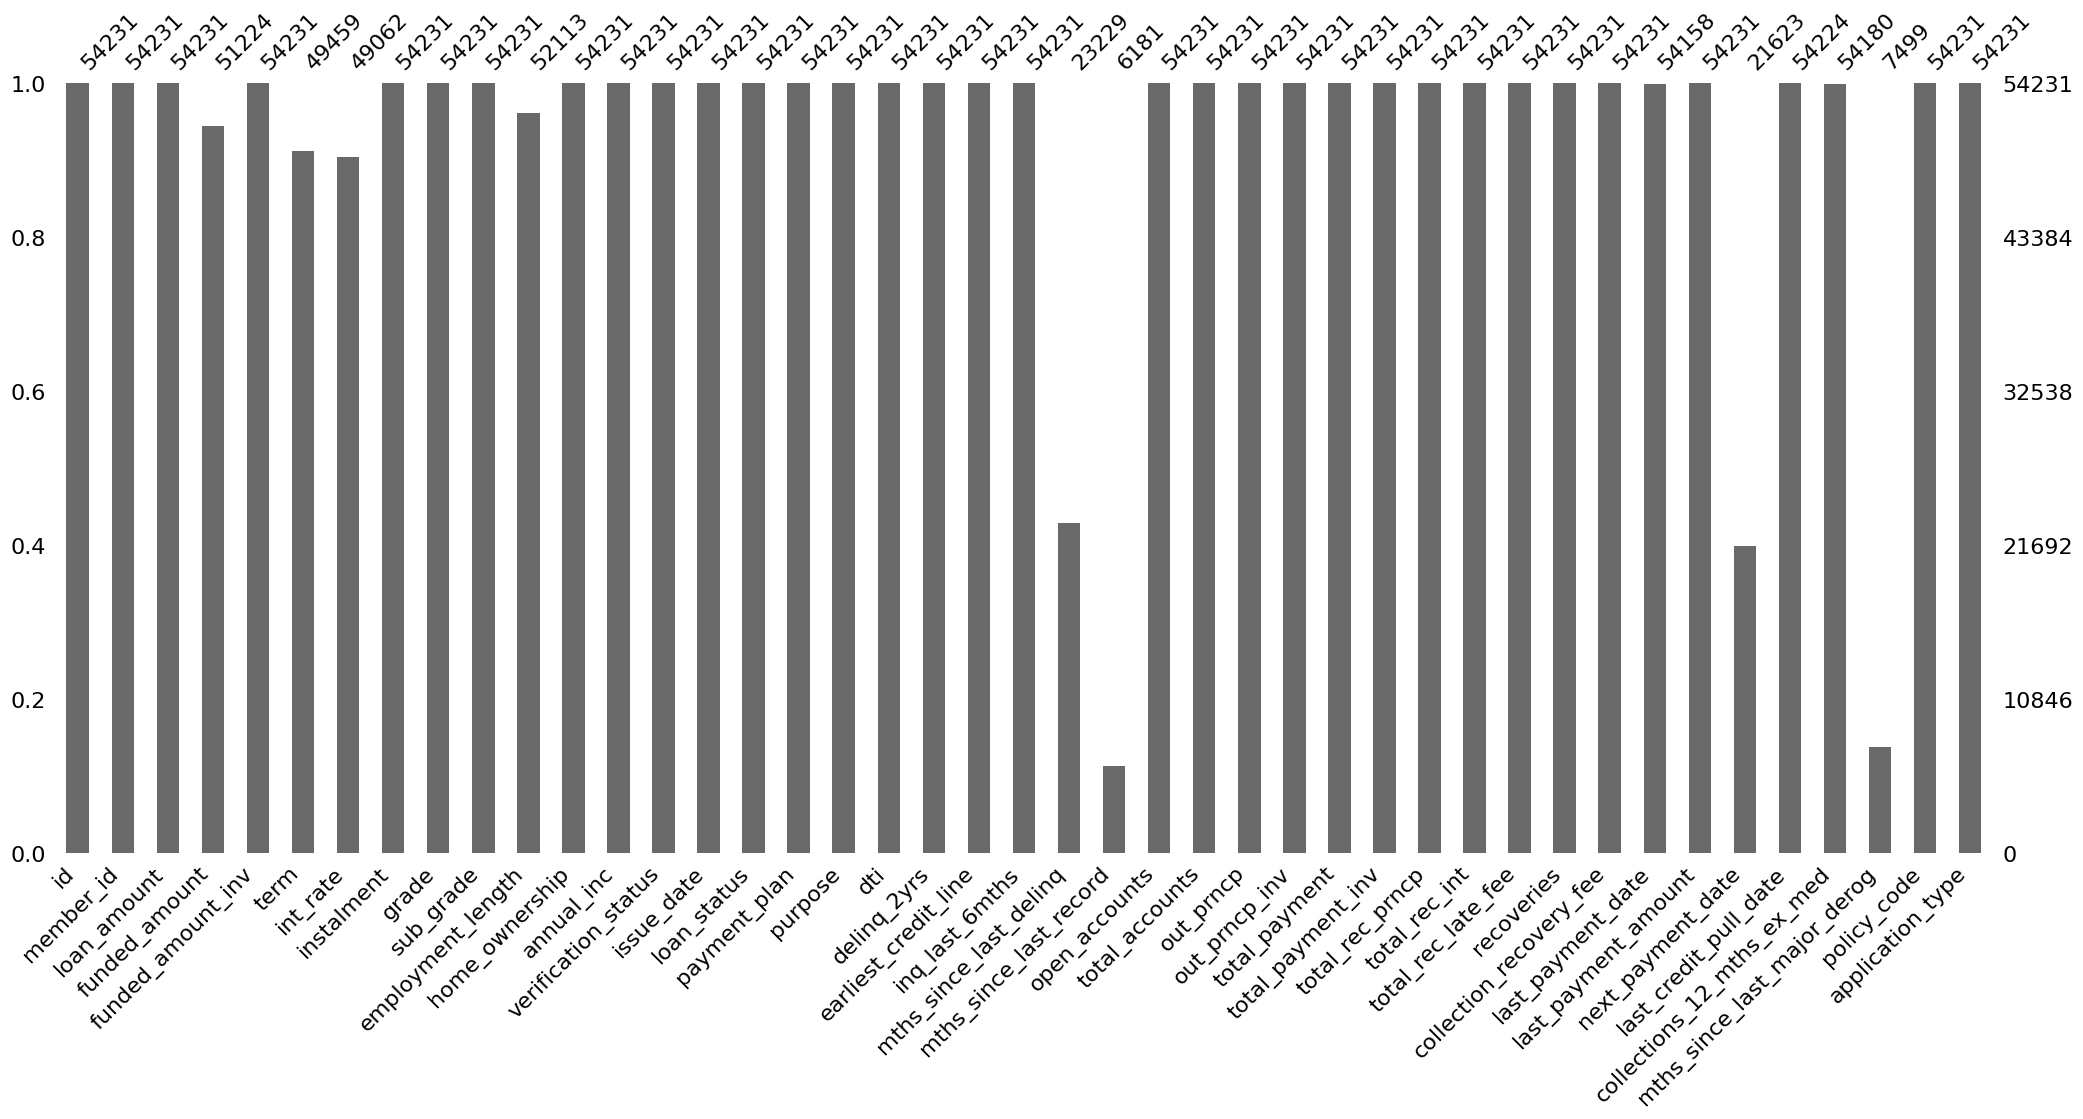

In [4]:
msno.bar(df)

In [10]:
transformer.drop_column([ "mths_since_last_delinq", "mths_since_last_record", "next_payment_date", "mths_since_last_major_derog"])
df_plot.histogram('funded_amount', 20)

df["funded_amount"] = df["funded_amount"].fillna(df["loan_amount"])
term_mode = df["term"].mode().iloc[0]

df["term"].fillna(term_mode, inplace=True)
df = df.dropna(subset=['last_payment_date', 'last_credit_pull_date',
       'collections_12_mths_ex_med'])
df_info = DataFrameInfo(df)
df_plot = Plotter(df)

df_info.get_missing_values()

df_plot = Plotter(df)
df_plot.histogram('int_rate', 20)

skew_df = df['int_rate'].skew()
print(skew_df)

KeyError: "['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog'] not found in axis"

In [6]:
df['int_rate'].mean()
df["int_rate"] = df["int_rate"].fillna(df["int_rate"].mean())
df['int_rate'].head(50)


C:\Users\milan\AppData\Local\Temp\ipykernel_37580\1194472162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_rate"] = df["int_rate"].fillna(df["int_rate"].mean())


0      7.490000
1      6.990000
2      7.490000
3     14.310000
4      6.030000
5     11.440000
6     21.990000
7     19.990000
8     12.990000
9      8.190000
10     8.190000
11    10.490000
12    12.390000
13     6.990000
14    13.660000
15    13.507936
16     8.190000
17    13.660000
18    12.390000
19    13.507936
20     6.990000
21    22.990000
22    15.990000
23    19.990000
24    12.990000
25    24.990000
26    19.990000
27     9.490000
28     6.990000
29    21.990000
30    15.590000
31    10.490000
32    14.310000
33    19.240000
34     6.490000
35    16.490000
36    12.390000
37    19.240000
38    17.140000
39    14.310000
40    18.540000
41     8.190000
42     8.670000
43    12.990000
44    12.390000
45    15.590000
46    18.540000
47    11.440000
48    18.540000
49    15.590000
Name: int_rate, dtype: float64

[[<Axes: title={'center': 'id'}> <Axes: title={'center': 'member_id'}>
  <Axes: title={'center': 'loan_amount'}>
  <Axes: title={'center': 'funded_amount'}>
  <Axes: title={'center': 'funded_amount_inv'}>]
 [<Axes: title={'center': 'int_rate'}>
  <Axes: title={'center': 'instalment'}>
  <Axes: title={'center': 'annual_inc'}> <Axes: title={'center': 'dti'}>
  <Axes: title={'center': 'delinq_2yrs'}>]
 [<Axes: title={'center': 'inq_last_6mths'}>
  <Axes: title={'center': 'open_accounts'}>
  <Axes: title={'center': 'total_accounts'}>
  <Axes: title={'center': 'out_prncp'}>
  <Axes: title={'center': 'out_prncp_inv'}>]
 [<Axes: title={'center': 'total_payment'}>
  <Axes: title={'center': 'total_payment_inv'}>
  <Axes: title={'center': 'total_rec_prncp'}>
  <Axes: title={'center': 'total_rec_int'}>
  <Axes: title={'center': 'total_rec_late_fee'}>]
 [<Axes: title={'center': 'recoveries'}>
  <Axes: title={'center': 'collection_recovery_fee'}>
  <Axes: title={'center': 'last_payment_amount'}>
  

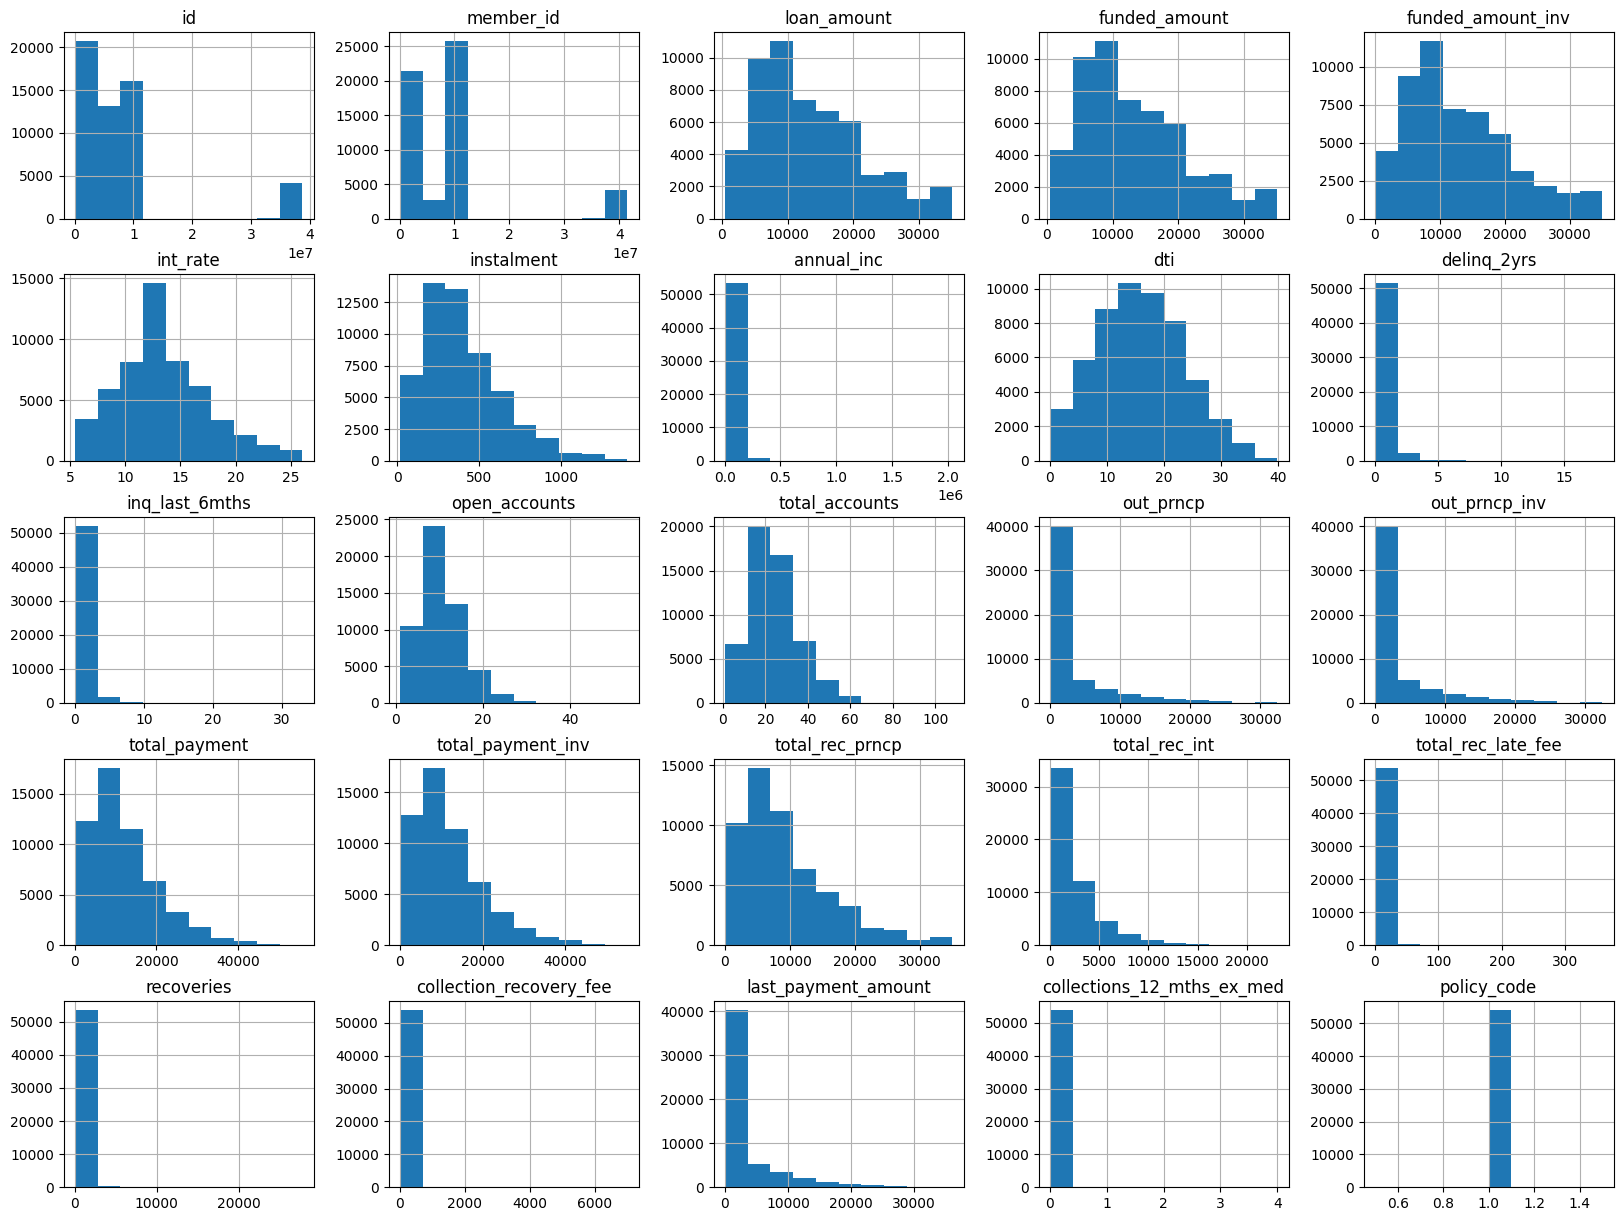

In [7]:
print(df.hist(figsize=(20,15)))

In [11]:
df[['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment', 'open_accounts', 'total_accounts','out_prncp','out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']].skew(numeric_only=False)

loan_amount            0.804312
funded_amount          0.819681
funded_amount_inv      0.814251
instalment             0.996150
open_accounts          1.059493
total_accounts         0.780083
out_prncp              2.352526
out_prncp_inv          2.352946
total_payment          1.269266
total_payment_inv      1.258474
total_rec_prncp        1.262007
total_rec_int          2.203625
last_payment_amount    2.496079
dtype: float64

In [12]:
transformed_df1 = SkewTransform(df)
transformed_df = transformed_df1
transformed_df.transform_log()

skew_df = df.skew(numeric_only=True).to_frame().reset_index()
skew_df = skew_df.loc[abs(skew_df[0]) >= 0.5]
skew_df

c:\Milan\Career\Self-Study\Ai Core\Exploratory Data Analysis - Customer Loans in Finance\main\skew.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column] = self.df[column].map(lambda i: np.log1p(i) if i > 0 else 0)


,index,0
2,loan_amount,0.804312
3,funded_amount,0.819681
4,funded_amount_inv,0.814251
6,instalment,0.996150
9,delinq_2yrs,2.559202
10,inq_last_6mths,0.701589
11,open_accounts,1.059493
12,total_accounts,0.780083
13,out_prncp,0.573207
14,out_prncp_inv,0.573281


array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'funded_amount'}>,
        <Axes: title={'center': 'funded_amount_inv'}>,
        <Axes: title={'center': 'instalment'}>],
       [<Axes: title={'center': 'open_accounts'}>,
        <Axes: title={'center': 'total_accounts'}>,
        <Axes: title={'center': 'out_prncp'}>,
        <Axes: title={'center': 'out_prncp_inv'}>],
       [<Axes: title={'center': 'total_payment'}>,
        <Axes: title={'center': 'total_payment_inv'}>,
        <Axes: title={'center': 'total_rec_prncp'}>,
        <Axes: title={'center': 'total_rec_int'}>],
       [<Axes: title={'center': 'last_payment_amount'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

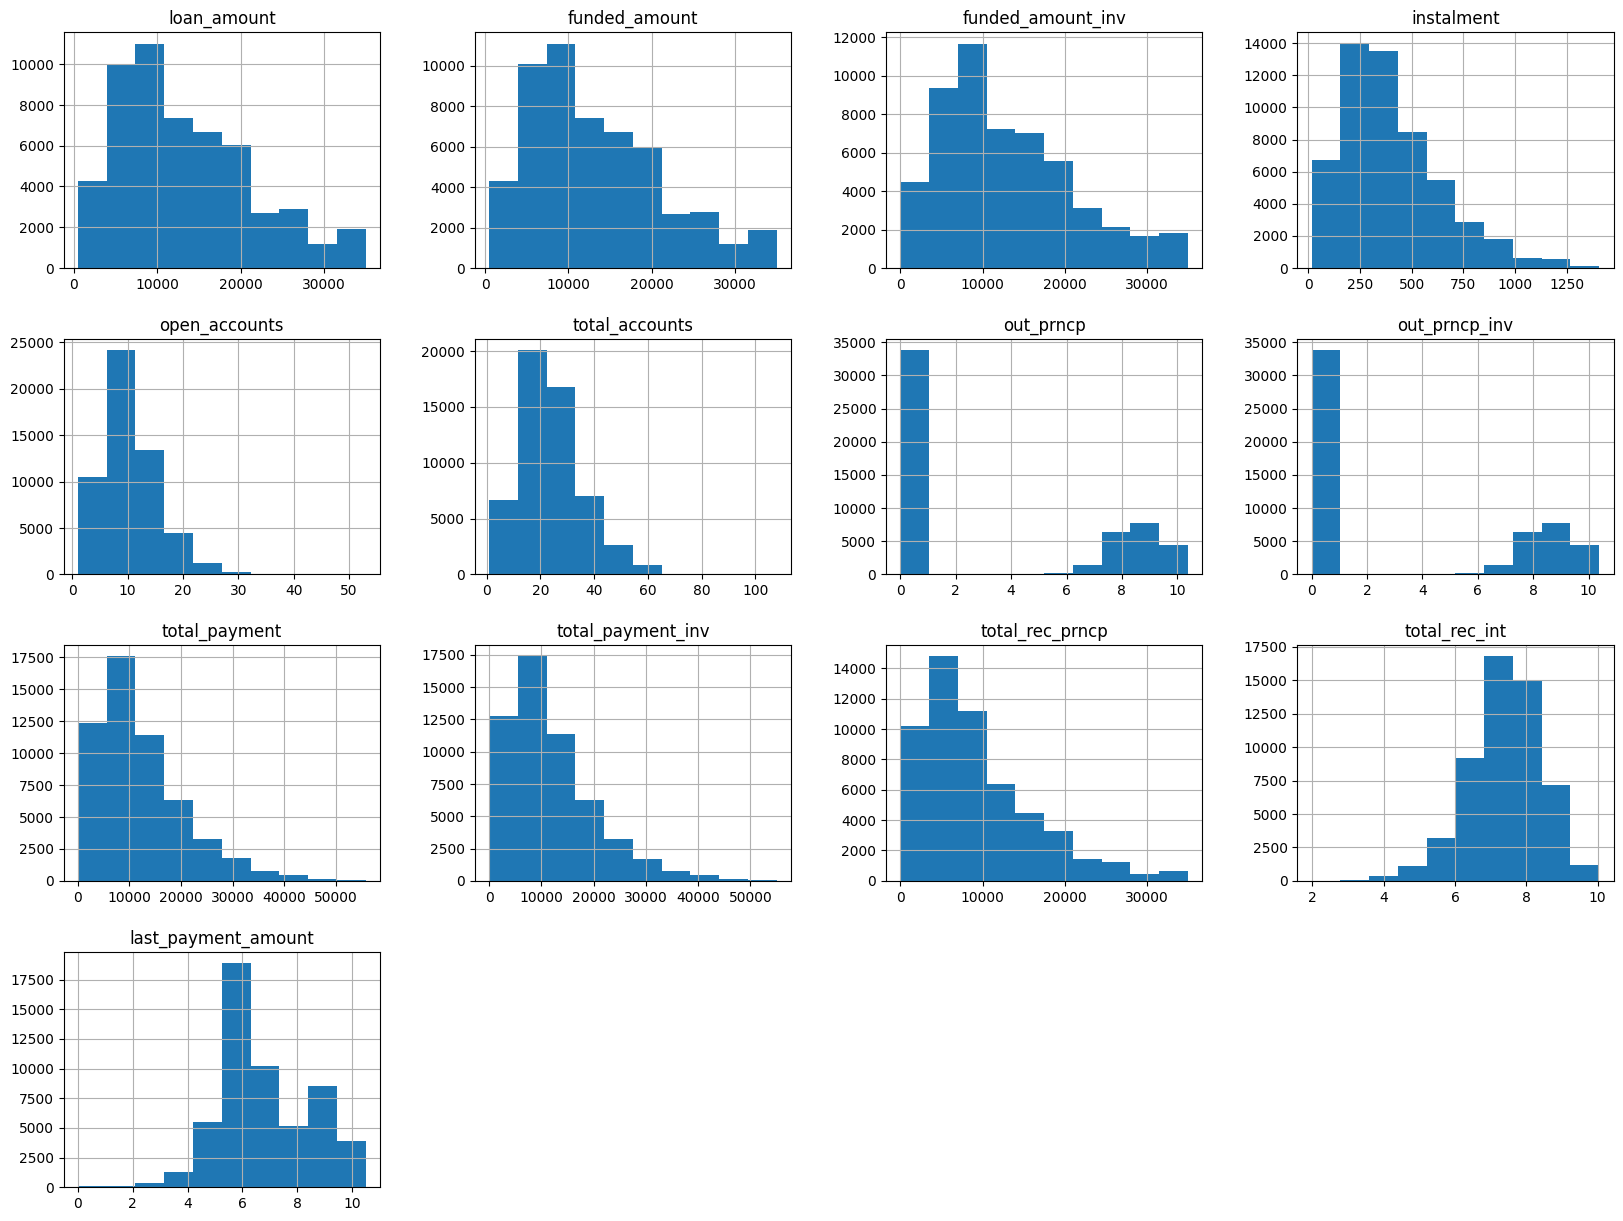

In [13]:
df[['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment',
         'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 
        'total_payment', 'total_payment_inv', 'total_rec_prncp',
        'total_rec_int', 'last_payment_amount']].hist(figsize=(20,15))

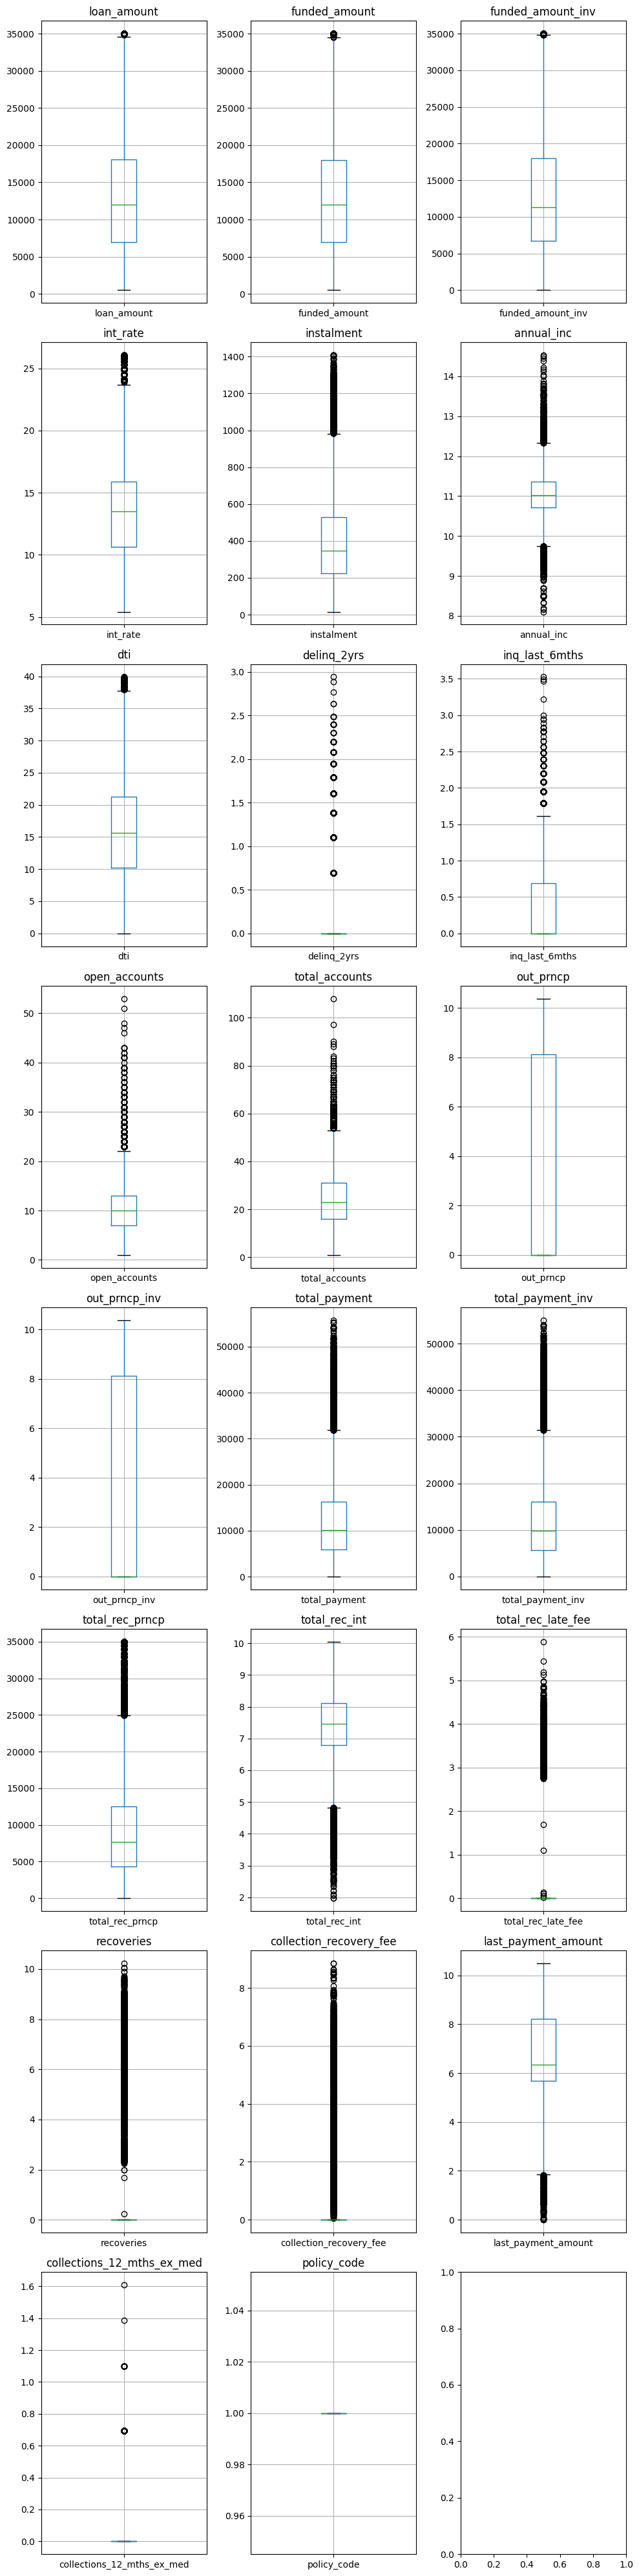

In [14]:
df[['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment', 'open_accounts', 'total_accounts','out_prncp','out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']].skew(numeric_only=False)

columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_payment_amount', 'collections_12_mths_ex_med', 'policy_code']

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(10, 40))
axes = axes.flatten()

for idx, column in enumerate(columns):
    df.boxplot(column=column, ax=axes[idx])
    axes[idx].set_title(column)

plt.tight_layout()
plt.show()

In [15]:

def remove_outliers_for_column(df, column, threshold=2):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    outliers = z_scores.abs() > threshold
    df_outliers = df[outliers]
    return df_outliers

df_outliers = remove_outliers_for_column(df, 'total_accounts')
df_outliers = remove_outliers_for_column(df, 'inq_last_6mths')

skew_df = df_outliers[["total_accounts", "inq_last_6mths"]].skew(numeric_only=True).to_frame().reset_index()
skew_df

,index,0
0,total_accounts,0.634160
1,inq_last_6mths,2.379883


In [18]:
df['loan_status'].value_counts()

charged_off_loans = df[df['loan_status'] == 'Charged Off']
charged_off_percentage = (charged_off_loans.shape[0] / df.shape[0]) * 100
total_amount_paid_charged_off = charged_off_loans['total_payment'].sum()

print(f"Percentage of charged-off loans historically: {charged_off_percentage:.2f}%")
print(f"Total paid for charged-off loans: £{total_amount_paid_charged_off:.2f}")

total_payments_made = (df["total_payment"].sum() /df["funded_amount"].sum()) * 100
total_payments_investor = (df["total_payment"].sum() /df["funded_amount_inv"].sum()) * 100
print(total_payments_made)
print(total_payments_investor)

Percentage of charged-off loans historically: 10.17%
Total paid for charged-off loans: £37282284.32
91.34191590342688
93.29114033873034


C:\Users\milan\AppData\Local\Temp\ipykernel_37580\2276868672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['remaining_term'] = charged_off_loans['loan_amount'] - charged_off_loans['total_rec_prncp']
C:\Users\milan\AppData\Local\Temp\ipykernel_37580\2276868672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['remaining_loss'] = charged_off_loans['recoveries'] + charged_off_loans['collection_recovery_fee']


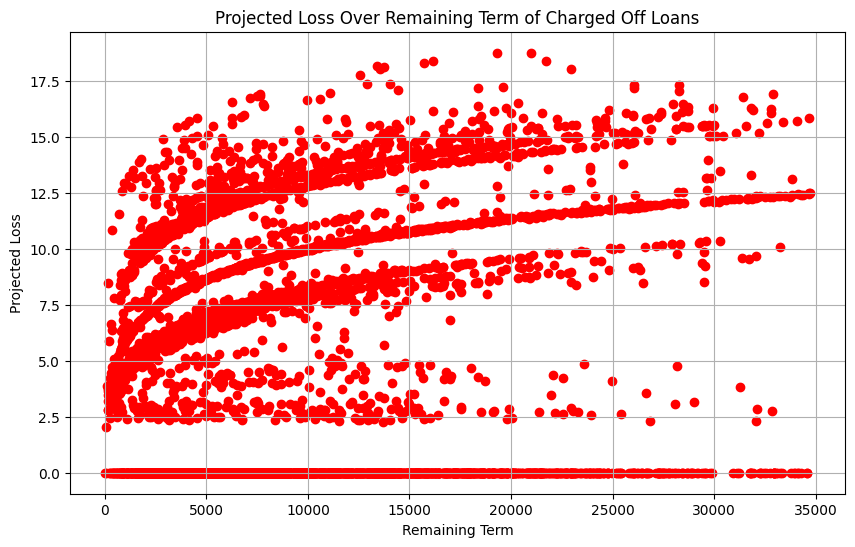

Total Projected Loss of Charged Off Loans: $31816.80


In [22]:
charged_off_loans['remaining_term'] = charged_off_loans['loan_amount'] - charged_off_loans['total_rec_prncp']

charged_off_loans['remaining_loss'] = charged_off_loans['recoveries'] + charged_off_loans['collection_recovery_fee']

plt.figure(figsize=(10, 6))
plt.scatter(charged_off_loans['remaining_term'], charged_off_loans['remaining_loss'], color='red')
plt.title('Projected Loss Over Remaining Term of Charged Off Loans')
plt.xlabel('Remaining Term')
plt.ylabel('Projected Loss')
plt.grid(True)
plt.show()

total_projected_loss = charged_off_loans['remaining_loss'].sum()
print(f"Total Projected Loss of Charged Off Loans: ${total_projected_loss:.2f}")

In [23]:
late_payments = df[df['loan_status'] == 'Late']

percentage_late_payments = (len(late_payments) / len(df)) * 100
print(f"Percentage of customers currently late on payments: {percentage_late_payments:.2f}%")

total_late_customers = len(late_payments)

loss_if_charged_off = late_payments['recoveries'].sum() + late_payments['collection_recovery_fee'].sum()
print(f"Total loss if customers' status changed to Charged Off: ${loss_if_charged_off:.2f}")

projected_loss_if_finished = late_payments['loan_amount'].sum() - late_payments['total_rec_prncp'].sum()
print(f"Projected loss if customers finish their loan terms: ${projected_loss_if_finished:.2f}")

total_revenue = df['loan_amount'].sum()
late_payment_default_revenue = (loss_if_charged_off + projected_loss_if_finished) / total_revenue * 100
print(f"Percentage of total expected revenue from late payments and defaults: {late_payment_default_revenue:.2f}%")

Percentage of customers currently late on payments: 0.00%
Total loss if customers' status changed to Charged Off: $0.00
Projected loss if customers finish their loan terms: $0.00
Percentage of total expected revenue from late payments and defaults: 0.00%


       Charged Off  Late Payments
grade                            
C         0.266545            NaN
B         0.232545            NaN
D         0.212545            NaN
E         0.127273            NaN
A         0.076727            NaN
F         0.065273            NaN
G         0.019091            NaN
                    Charged Off  Late Payments
purpose                                       
debt_consolidation     0.553636            NaN
credit_card            0.158727            NaN
other                  0.086364            NaN
small_business         0.053818            NaN
home_improvement       0.048364            NaN
major_purchase         0.030000            NaN
car                    0.016182            NaN
medical                0.014364            NaN
moving                 0.011455            NaN
house                  0.006909            NaN
wedding                0.006909            NaN
vacation               0.006545            NaN
educational            0.004727     

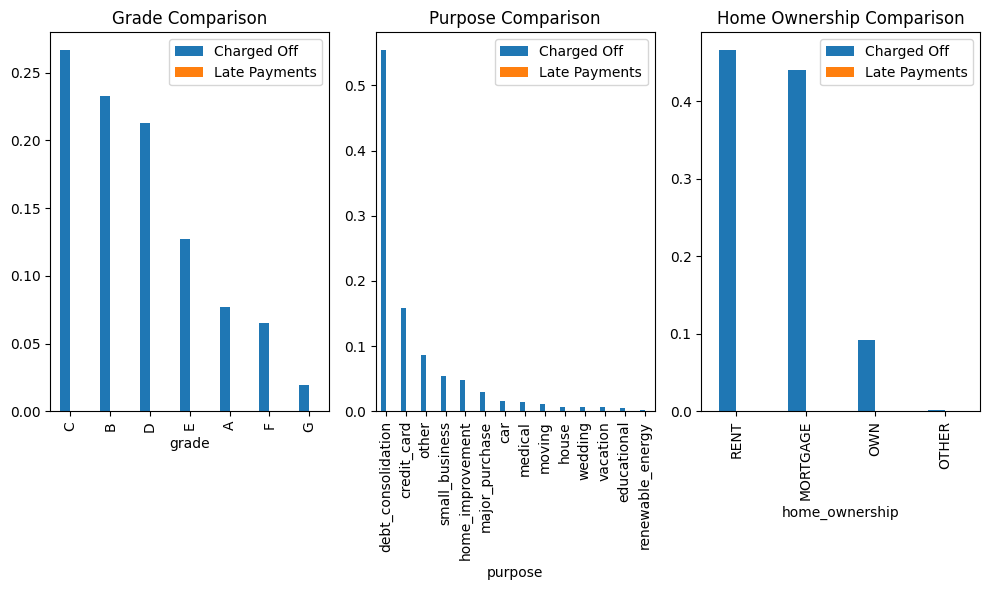

In [21]:
charged_off = df[df['loan_status'] == 'Charged Off']
late_payments = df[df['loan_status'] == 'Late']

grade_comparison = pd.concat([charged_off['grade'].value_counts(normalize=True), late_payments['grade'].value_counts(normalize=True)], axis=1)
grade_comparison.columns = ['Charged Off', 'Late Payments']
print(grade_comparison)

purpose_comparison = pd.concat([charged_off['purpose'].value_counts(normalize=True), late_payments['purpose'].value_counts(normalize=True)], axis=1)
purpose_comparison.columns = ['Charged Off', 'Late Payments']
print(purpose_comparison)

home_comparison = pd.concat([charged_off['home_ownership'].value_counts(normalize=True), late_payments['home_ownership'].value_counts(normalize=True)], axis=1)
home_comparison.columns = ['Charged Off', 'Late Payments']
print(home_comparison)


plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
grade_comparison.plot(kind='bar', ax=plt.gca())
plt.title('Grade Comparison')

plt.subplot(1, 3, 2)
purpose_comparison.plot(kind='bar', ax=plt.gca())
plt.title('Purpose Comparison')

plt.subplot(1, 3, 3)
home_comparison.plot(kind='bar', ax=plt.gca())
plt.title('Home Ownership Comparison')

plt.tight_layout()
plt.show()